# Rewriting $\pi$ Calculation
## Approach
The goal was to take the original code using a `for` loop to randomly generate coordinates and replace with `NumPy` functions and check the performance. To do this, the following changes were made:
* `np.random.random_sample` was used to generate two random arrays `x_coords` and `y_coords`
* `np.sqrt` was used on the sum of the square of each of those arrays to create a radius `r` array
* `np.floor` was used on `r` to give a value of **0** to points inside of the unit circle or **1** for points outside of the circle and stored in array `r_down`
* use `sum(axis=0)` on `r_down` to count `n_outside`
* use `n_outside` and `n_samples`to get `n_inside` and leverage the exising `integrate` code to calculate **$\pi$**

Once the code was rewritten, `time` was used to run the new code and old code each with `n_samples` = **100** and **1000000** 

## Observations
For `n_samples` = **100**, there was no clear winner in terms of speed. For `n_samples` = **10000000**, the new code consistently ran in **< 1s** while the old code would run **< 5s**. It seems that the `NumPy` version dramatically increases speed for larger sample sizes.

3.1146666666666665


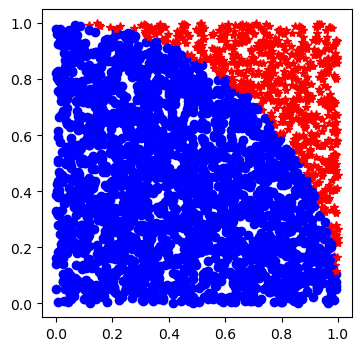

In [1]:
# ORIGINAL CODE

import math
import random
import matplotlib.pyplot as plt

# create a figure
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

# deinfe total number points I will generate
n_samples = 3000

# define variable for count
num_inside = 0

# Create a for loop for generating n_samples number of points
for i in range(n_samples):
    
    # Generate a random point between 0 and 1 for our x value
    x = random.random()

    # Generate a random point between 1 and 1 for our y value
    y = random.random()

    # Calculate the distance of the point from the origin
    distance = math.sqrt( x**2 + y**2 )
    
    # Increase the count if distance is less than 1.
    if distance < 1:
        num_inside += 1
        ax.plot(x, y, "ob")
    else:
        ax.plot(x, y, "r*")

# Calculate integral
integral = num_inside / n_samples
my_pi = 4 * integral
print(my_pi)

In [2]:
# REWRITE CODE USING NumPy
import numpy as np

n_samples = 100

# Generate array of x_coordinates using NumPy
x_coords = np.random.random_sample(n_samples)

# Generate array of y_coordinates using NumPy
y_coords = np.random.random_sample(n_samples)

# Calculate radius of each point
r = np.sqrt(x_coords**2 + y_coords**2)

# Convert values so inside points = 0 and outside points = 1
r_down =np.floor(r)

# Use sum to count number of points outside and then find number of points inside
n_outside = r_down.sum(axis=0)
n_inside = n_samples - n_outside

# Calculate integral
integral = n_inside / n_samples
my_pi = 4 * integral
print(my_pi)

3.16


In [5]:
# calculate run time with numpy method for n_samples = 100

import time

start = time.time()

n_samples = 100

# Generate array of x_coordinates using NumPy
x_coords = np.random.random_sample(n_samples)

# Generate array of y_coordinates using NumPy
y_coords = np.random.random_sample(n_samples)

# Calculate radius of each point
r = np.sqrt(x_coords**2 + y_coords**2)

# Convert values so inside points = 0 and outside points = 1
r_down =np.floor(r)

# Use sum to count number of points outside and then find number of points inside
n_outside = r_down.sum(axis=0)
n_inside = n_samples - n_outside

# Calculate integral
integral = n_inside / n_samples
my_pi = 4 * integral
print(my_pi)

end = time.time()

elapsed_time2 = end - start
print(elapsed_time2)

2.92
0.0034799575805664062


In [6]:
# calculate run time with numpy method for n_samples = 10000000
start = time.time()

n_samples = 10000000

# Generate array of x_coordinates using NumPy
x_coords = np.random.random_sample(n_samples)

# Generate array of y_coordinates using NumPy
y_coords = np.random.random_sample(n_samples)

# Calculate radius of each point
r = np.sqrt(x_coords**2 + y_coords**2)

# Convert values so inside points = 0 and outside points = 1
r_down =np.floor(r)

# Use sum to count number of points outside and then find number of points inside
n_outside = r_down.sum(axis=0)
n_inside = n_samples - n_outside

# Calculate integral
integral = n_inside / n_samples
my_pi = 4 * integral
print(my_pi)

end = time.time()

elapsed_time2 = end - start
print(elapsed_time2)

3.1421136
0.2605743408203125


In [7]:
# calculate run time using original method without plotting chart for n_samples = 100
start = time.time()

# define total number points I will generate
n_samples = 100

# define variable for count
num_inside = 0

# Create a for loop for generating n_samples number of points
for i in range(n_samples):
    
    # Generate a random point between 0 and 1 for our x value
    x = random.random()

    # Generate a random point between 1 and 1 for our y value
    y = random.random()

    # Calculate the distance of the point from the origin
    distance = math.sqrt( x**2 + y**2 )
    
    # Increase the count if distance is less than 1.
    if distance < 1:
        num_inside += 1
          
# Calculate integral
integral = num_inside / n_samples
my_pi = 4 * integral
print(my_pi)
end = time.time()

elapsed_time2 = end - start
print(elapsed_time2)

3.24
0.0005908012390136719


In [8]:
# calculate run time using original method without plotting chart for n_samples = 10000000
start = time.time()

# define total number points I will generate
n_samples = 10000000

# define variable for count
num_inside = 0

# Create a for loop for generating n_samples number of points
for i in range(n_samples):
    
    # Generate a random point between 0 and 1 for our x value
    x = random.random()

    # Generate a random point between 1 and 1 for our y value
    y = random.random()

    # Calculate the distance of the point from the origin
    distance = math.sqrt( x**2 + y**2 )
    
    # Increase the count if distance is less than 1.
    if distance < 1:
        num_inside += 1
          
# Calculate integral
integral = num_inside / n_samples
my_pi = 4 * integral
print(my_pi)
end = time.time()

elapsed_time2 = end - start
print(elapsed_time2)

3.1418424
4.109715700149536


# Molecular Monte Carlo using NumPy
We took the approach of going through each function to identify ways where we could leverage NumPy. Here are the points:
* `calculate_LJ` 
    * nothing comes to mind
* `calculate_distance` 
    * already converted in lecture
* `calculate_total_energy`
    * we might be able to leverage np to remove one of the for loops to run np calculations
* `read_xyz`
    * we can have it return a np array to make sure downstream calculations can access np functions
* `calculate_tail_correction`
    * nothing comes to mind - this seems like a straightforward equation. 
* `lattice_sample_config`
    * can use np to generate lattice configuration array positions; this can likely replace all for loops
* `accept_or_reject`
    * nothing comes to mind - this seems like a straightforward decision maker
* `calculate_pair_energy`
    * we can use numpy to run calculation on an array of distances of each pairwise interaction, check the cutoff and sum the total energy difference
* `run simulation`
    * We can use numpy to move the particle